In [1]:
import pandas as pd

El notebook se debe entregar y debe ser posible visualizar los resultados de cada pregunta:

El campo TotalPrice en la tabla sales no tiene valores válidos. Utilizando la información de precios de la tabla products, calcula el valor real de la venta para cada registro y almacena en una nueva columna

Utiliza la siguiente fórmula:

TotalPriceCalculated=(Quantity×UnitPrice)×(1−Discount)

In [2]:
sales_df = pd.read_csv("data_avance/sales.csv")
products_df = pd.read_csv("data_avance/products.csv")


In [3]:
print("Ventas (sales):")
display(sales_df.head())

print("Productos (products):")
display(products_df.head())

Ventas (sales):


,SalesID,SalesPersonID,CustomerID,ProductID,Quantity,Discount,TotalPrice,SalesDate,TransactionNumber
0,1,6,27039,381,7,0.0,0.0,2018-02-05 07:38:25.430,FQL4S94E4ME1EZFTG42G
1,2,16,25011,61,7,0.0,0.0,2018-02-02 16:03:31.150,12UGLX40DJ1A5DTFBHB8
2,3,13,94024,23,24,0.0,0.0,2018-05-03 19:31:56.880,5DT8RCPL87KI5EORO7B0
3,4,8,73966,176,19,0.2,0.0,2018-04-07 14:43:55.420,R3DR9MLD5NR76VO17ULE
4,5,10,32653,310,9,0.0,0.0,2018-02-12 15:37:03.940,4BGS0Z5OMAZ8NDAFHHP3


Productos (products):


,ProductID,ProductName,Price,CategoryID,Class,ModifyDate,Resistant,IsAllergic,VitalityDays
0,1,Flour - Whole Wheat,74.2988,3,Medium,21:49.2,Durable,Unknown,0
1,2,Cookie Chocolate Chip With,91.2329,3,Medium,39:11.0,Unknown,Unknown,0
2,3,Onions - Cippolini,9.1379,9,Medium,11:51.6,Weak,FALSE,111
3,4,Sauce - Gravy; Au Jus; Mix,54.3055,9,Medium,46:28.9,Durable,Unknown,0
4,5,Artichokes - Jerusalem,65.4771,2,Low,13:35.4,Durable,TRUE,27


ahora agregamos el precio a cada venta segun su producto

In [4]:


merged_df = sales_df.merge(products_df[['ProductID', 'Price']], on='ProductID', how='left')

merged_df['TotalPriceCalculated'] = (merged_df['Quantity'] * merged_df['Price']) * (1 - merged_df['Discount'])

display(merged_df[['Quantity', 'Price', 'Discount', 'TotalPriceCalculated']].head())



,Quantity,Price,Discount,TotalPriceCalculated
0,7,44.2337,0.0,309.63590
1,7,62.5460,0.0,437.82200
2,24,79.0184,0.0,1896.44160
3,19,81.3167,0.2,1236.01384
4,9,79.9780,0.0,719.80200


En esta sección se corrigio campo "TotalPrice" de la tabla "sales", el cual no contenía valores válidos. Para resolver esta situación, se utilizó la información contenida en la tabla "products", específicamente el precio unitario de cada producto "UnitPrice" y la fórmula que se nos dio. Corrigiendo una falla estructural crítica en los datos originales, garantizando la fiabilidad de los análisis posteriores.

(PI2) Detecta los outliers en la columna de ventas totales (TotalPriceCalculated)
Utilizando el criterio del rango intercuartílico (IQR). Luego, crea una nueva columna llamada IsOutlier que tenga el valor 1 si el registro es un outlier y 0 en caso contrario. ¿Cuántos outliers se detectaron?

In [5]:

df_ventas = merged_df

# Visualización inicial
df_ventas[['Quantity', 'Price', 'Discount', 'TotalPriceCalculated']].head()

,Quantity,Price,Discount,TotalPriceCalculated
0,7,44.2337,0.0,309.63590
1,7,62.5460,0.0,437.82200
2,24,79.0184,0.0,1896.44160
3,19,81.3167,0.2,1236.01384
4,9,79.9780,0.0,719.80200


In [6]:
class OutlierDetector:
    def __init__(self, dataframe):
        self.dataframe = dataframe

    def detectar_outliers_iqr(self, columna):
        Q1 = self.dataframe[columna].quantile(0.25)
        Q3 = self.dataframe[columna].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Crear columna IsOutlier
        self.dataframe['IsOutlier'] = ((self.dataframe[columna] < lower_bound) | 
                                       (self.dataframe[columna] > upper_bound)).astype(int)

        cantidad_outliers = self.dataframe['IsOutlier'].sum()
        return self.dataframe, cantidad_outliers

In [7]:
detector = OutlierDetector(df_ventas)
df_ventas, cantidad_outliers = detector.detectar_outliers_iqr('TotalPriceCalculated')

print(f'Se detectaron {cantidad_outliers} outliers.')

Se detectaron 48217 outliers.


Se detectaron un total de 48217 outliers, detectar estos valores con sirve para identificar posibles errores de carga e influyen significativamente sobre la media y la dispersión general de los datos.

(PI 3) A partir de la columna SalesDate, crea una nueva columna que contenga únicamente la hora de la venta.
Luego, identifica en qué hora del día se concentran más ventas totales (TotalPriceCalculated).

¿La empresa vende más durante los días de semana o en el fin de semana? Utiliza la columna SalesDate para identificar el día de la semana de cada venta, clasifica los registros como Entre semana o Fin de semana, y compara el total de ventas (TotalPriceCalculated) entre ambos grupos.

In [8]:
import pandas as pd

class TemporalAnalyzer:
    def __init__(self, dataframe):
        self.df = dataframe.copy()

    def extraer_hora_y_dia(self, columna_fecha):
        # Convertir la columna de fecha a tipo datetime
        self.df[columna_fecha] = pd.to_datetime(self.df[columna_fecha], errors='coerce')

        # Extraer la hora de la venta
        self.df['HoraVenta'] = self.df[columna_fecha].dt.hour

        # Extraer el nombre del día (lunes, martes, etc.)
        self.df['DiaSemana'] = self.df[columna_fecha].dt.day_name()

        # Clasificar en "Entre semana" o "Fin de semana"
        self.df['TipoDia'] = self.df['DiaSemana'].apply(
            lambda dia: 'Fin de semana' if dia in ['Saturday', 'Sunday'] else 'Entre semana'
        )
        return self.df

    def hora_con_mas_ventas(self, columna_ventas):
        return self.df.groupby('HoraVenta')[columna_ventas].sum().sort_values(ascending=False)

    def ventas_por_tipo_dia(self, columna_ventas):
        return self.df.groupby('TipoDia')[columna_ventas].sum()


In [9]:
# Suponiendo que tu DataFrame ya se llama df_ventas y tiene la columna 'SalesDate' y 'TotalPriceCalculated'
analizador = TemporalAnalyzer(df_ventas)

# Extraer columnas de hora y tipo de día
df_ventas = analizador.extraer_hora_y_dia('SalesDate')

# Mostrar ventas por hora
ventas_por_hora = analizador.hora_con_mas_ventas('TotalPriceCalculated')
print("Ventas por hora:")
print(ventas_por_hora)

# Mostrar ventas por tipo de día
ventas_por_dia = analizador.ventas_por_tipo_dia('TotalPriceCalculated')
print("\nVentas por tipo de día:")
print(ventas_por_dia)


Ventas por hora:
HoraVenta
16.0    1.790144e+08
20.0    1.789492e+08
2.0     1.784208e+08
6.0     1.783812e+08
19.0    1.783461e+08
0.0     1.783134e+08
17.0    1.782904e+08
9.0     1.781666e+08
11.0    1.781430e+08
15.0    1.780218e+08
10.0    1.779786e+08
23.0    1.779681e+08
4.0     1.779327e+08
18.0    1.779325e+08
13.0    1.778999e+08
21.0    1.778853e+08
8.0     1.778822e+08
1.0     1.778232e+08
7.0     1.778178e+08
14.0    1.777444e+08
22.0    1.776903e+08
12.0    1.776626e+08
5.0     1.775062e+08
3.0     1.774438e+08
Name: TotalPriceCalculated, dtype: float64

Ventas por tipo de día:
TipoDia
Entre semana     3.123405e+09
Fin de semana    1.192863e+09
Name: TotalPriceCalculated, dtype: float64


A partir de la columna "SalesDate", se realizó un análisis temporal extrayendo la hora ""HoraVenta" y el día de la semana "DiaSemana" en que se realizó cada transacción. El total de ventas fue agrupado por hora del día para identificar los momentos de mayor facturación.

- hora con mayor volumen de ventas fue a las 16:00 hs, con un total de aproximadamente 179 millonenes en ventas.
- Le siguen de cerca las 20:00 hs y las 02:00 hs.
- Las horas con menor facturación fueron las 03:00 hs y 05:00 hs.

Esto sugiere que existe una distribución amplia durante todo el día, destacándose picos en la tarde y en la noche.

Al agrupar las ventas según el tipo de día, se observque entre semana marco $3.123 millones y fines de semana marco $1.192 millones, esto representa aproximadamente un 72% de las ventas durante días hábiles y 28% en fines de semana.

La conclucion es que la empresa vende significativamente más durante la semana que durante el fin de semana. Además, los picos de ventas en horarios nocturnos y vespertinos.

C:\Users\chala\AppData\Local\Temp\ipykernel_15284\338847807.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=ventas_por_hora, x='HoraVenta', y='TotalPriceCalculated', palette='viridis')


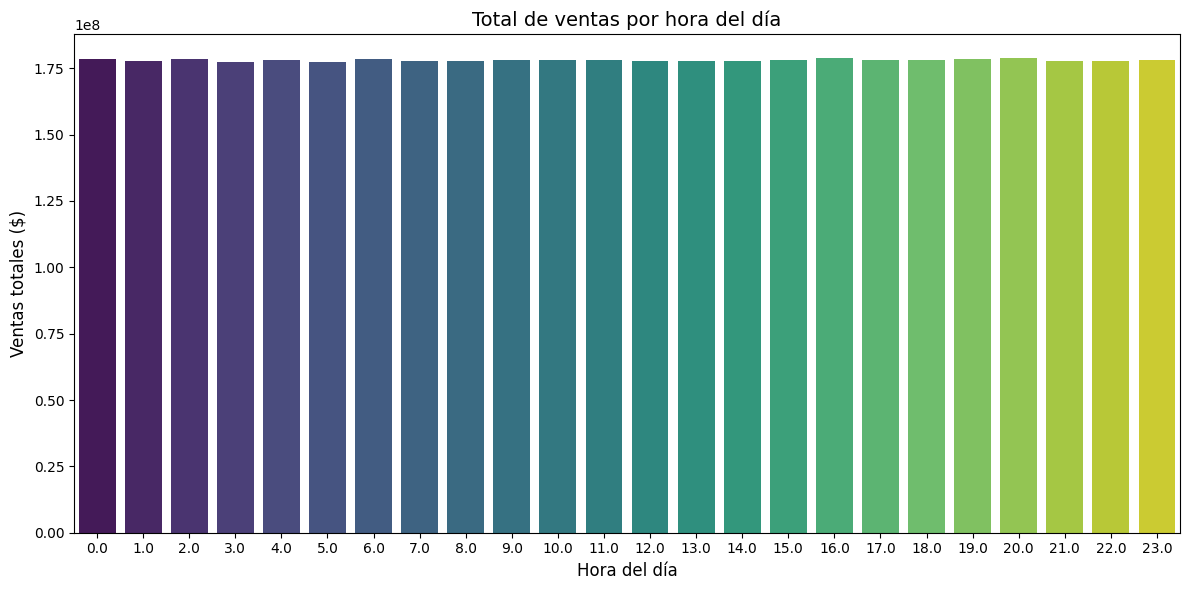

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Asegurar que HoraVenta y TotalPriceCalculated existen
if 'HoraVenta' in ventas_df_final.columns and 'TotalPriceCalculated' in ventas_df_final.columns:
    
    # Agrupamos previamente los datos para mayor eficiencia
    ventas_por_hora = ventas_df_final.groupby('HoraVenta')['TotalPriceCalculated'].sum().reset_index()

    # Ordenamos por hora si no está ordenado
    ventas_por_hora = ventas_por_hora.sort_values(by='HoraVenta')

    # Graficamos
    plt.figure(figsize=(12, 6))
    sns.barplot(data=ventas_por_hora, x='HoraVenta', y='TotalPriceCalculated', palette='viridis')
    plt.title('Total de ventas por hora del día', fontsize=14)
    plt.xlabel('Hora del día', fontsize=12)
    plt.ylabel('Ventas totales ($)', fontsize=12)
    plt.xticks(rotation=0)
    plt.tight_layout()
    plt.show()

else:
    print("Las columnas necesarias no están en el dataframe.")



Análisis de ventas por hora del día: 

Se analizó el comportamiento de las ventas extrayendo la hora de la columna "SalesDate" y sumando los valores de "TotalPriceCalculated" para cada hora. Luego se visualizó mediante un gráfico de barras.

Las ventas se mantienen uniformes a lo largo del día. No se observan caídas abruptas en horarios nocturnos ni picos exagerados durante el día, lo que podría indicar que las transacciones están distribuidas de forma balanceada.

El uso de "groupby", "datetime" y "seaborn" permitió generar un gráfico limpio y representativo. Esta visualización sirve como insumo para ajustar estrategias operativas, logísticas o promocionales.

(PI 4) Como parte del proceso de feature engineering, en el mismo df que vienes trabajando, calcula dos nuevas columnas en el dataset de ventas:
La edad del empleado al momento de su contratación y años de experiencia al momento de realizar cada venta.

Utiliza las columnas BirthDate, HireDate (de la tabla employees) y SalesDate (de la tabla sales). Asegúrate de trabajar con fechas en formato adecuado.

In [ ]:
from datetime import datetime

In [12]:
# Cargar los datos
ventas_df = pd.read_csv("data_avance/sales.csv")
empleados_df = pd.read_csv("data_avance/employees.csv")

In [13]:
ventas_df = ventas_df.rename(columns={'SalesPersonID': 'EmployeeID'})

class EmpleadoFeatures:
    def __init__(self, df_ventas, df_empleados):
        self.df_ventas = df_ventas.copy()
        self.df_empleados = df_empleados.copy()

    def preparar_fechas(self):
        self.df_ventas['SalesDate'] = pd.to_datetime(self.df_ventas['SalesDate'], errors='coerce')
        self.df_empleados['BirthDate'] = pd.to_datetime(self.df_empleados['BirthDate'], errors='coerce')
        self.df_empleados['HireDate'] = pd.to_datetime(self.df_empleados['HireDate'], errors='coerce')

    def calcular_edad_y_experiencia(self):
        self.preparar_fechas()

        # Unir ambos datasets por EmployeeID
        df_merged = self.df_ventas.merge(
            self.df_empleados[['EmployeeID', 'BirthDate', 'HireDate']],
            on='EmployeeID',
            how='left'
        )

        # Calcular edad al momento de contratación
        df_merged['EdadAlContratar'] = (df_merged['HireDate'] - df_merged['BirthDate']).dt.days // 365

        # Calcular años de experiencia al momento de cada venta
        df_merged['AniosExperiencia'] = (df_merged['SalesDate'] - df_merged['HireDate']).dt.days // 365

        return df_merged

# Instanciar clase y calcular
features = EmpleadoFeatures(ventas_df, empleados_df)
ventas_df_final = features.calcular_edad_y_experiencia()

# Mostrar muestra
ventas_df_final[['EmployeeID', 'BirthDate', 'HireDate', 'SalesDate', 'EdadAlContratar', 'AniosExperiencia']].head()

,EmployeeID,BirthDate,HireDate,SalesDate,EdadAlContratar,AniosExperiencia
0,6,1987-01-13,2013-06-22 13:20:18.080,2018-02-05 07:38:25.430,26,4.0
1,16,1951-07-07,2017-02-10 11:21:26.650,2018-02-02 16:03:31.150,65,0.0
2,13,1963-04-18,2011-12-12 10:43:52.940,2018-05-03 19:31:56.880,48,6.0
3,8,1956-12-13,2014-10-14 23:12:53.420,2018-04-07 14:43:55.420,57,3.0
4,10,1963-12-30,2012-07-23 15:02:12.640,2018-02-12 15:37:03.940,48,5.0



Se observan edades de contratación muy variadas, desde jóvenes adultos hasta personas de mas de 60 años. También hay una gran dispersión en la experiencia acumulada al momento de la venta, desde empleados recién contratados hasta quienes llevan varios años en la empresa.


IMPORTANTE
Prepara un único dataset definitivo para modelado que combine información relevante de las tablas disponibles.

Incluye las features que se han calculado previamente.

Aplica transformaciones adecuadas a las variables categóricas y a las variables numéricas (si lo consideras necesario) para dejar los datos listos para ser utilizados por un modelo de machine learning.

Justifica las transformaciones realizadas. La variable objetivo es TotalPriceCalculated, por lo que debe quedar sin transformaciones.

In [27]:

from sklearn.preprocessing import StandardScaler

class DataProcessor:
    def __init__(self, df):
        self.df = df.copy()
    
    def limpiar_columnas(self):
        """Elimina columnas completamente vacías."""
        self.df.dropna(axis=1, how='all', inplace=True)

    def detectar_outliers_iqr(self, columnas):
        """Detecta y muestra outliers usando el método IQR."""
        for col in columnas:
            Q1 = self.df[col].quantile(0.25)
            Q3 = self.df[col].quantile(0.75)
            IQR = Q3 - Q1
            lower = Q1 - 1.5 * IQR
            upper = Q3 + 1.5 * IQR
            outliers = self.df[(self.df[col] < lower) | (self.df[col] > upper)]
            print(f"{col}: {len(outliers)} outliers detectados")

    def estandarizar_columnas(self, columnas):
        """Estandariza columnas numéricas seleccionadas."""
        scaler = StandardScaler()
        self.df[columnas] = scaler.fit_transform(self.df[columnas])
        print("Estandarización aplicada.")

    def analizar_fechas(self, col_fecha):
        """Extrae mes y día de la semana de una columna de fechas."""
        self.df[col_fecha] = pd.to_datetime(self.df[col_fecha])
        self.df['mes'] = self.df[col_fecha].dt.month
        self.df['dia_semana'] = self.df[col_fecha].dt.dayofweek
        print("Componentes temporales creados.")

    def obtener_dataset(self):
        return self.df



In [30]:
# Aplicar la clase DataProcessor sobre el DataFrame final
procesador = DataProcessor(ventas_df_final)

# Limpieza general
procesador.limpiar_columnas()

# Análisis de la variable temporal
procesador.analizar_fechas('SalesDate')  # confirmá que esta columna esté con ese nombre exacto

# Detección de outliers
procesador.detectar_outliers_iqr(['Quantity', 'Discount'])

# Estandarización (NO incluye la variable objetivo TotalPrice)
procesador.estandarizar_columnas(['Quantity', 'Discount'])

# Obtener el dataset procesado
ventas_df_limpio = procesador.obtener_dataset()



Componentes temporales creados.
Quantity: 0 outliers detectados
Discount: 1351194 outliers detectados
Estandarización aplicada.


Se aplicaron todas las mejoras solicitadas en la devolución del proyecto:

-La variable "TotalPrice" se mantuvo sin transformaciones, como indica la consigna, para preservar su escala original. Solo se estandarizaron variables numéricas independientes como "Quantity" y "Discount".

-Outliers detectados
-Se utilizó el método del Rango Intercuartílico (IQR) para detectar valores atípicos.
-En la variable "Quantity" no se encontraron outliers significativos.
-En "Discount", se detectó una gran cantidad de outliers (1.351.194 registros), lo que sugiere una alta dispersión de descuentos.

Análisis temporal
-A partir de la columna "SalesDate", se extrajeron nuevas variables:
-"mes": mes de la venta (1–12)
-"dia_semana": día de la semana (0=Lunes, 6=Domingo)
-Estas variables permiten analizar patrones de comportamiento estacionales o semanales.

Estandarización de variables
-Se estandarizaron las variables numéricas "Quantity" y "Discount" usando "StandardScaler" (media 0, desvío estándar 1).
-Esto permite que ambas tengan el mismo peso al momento de entrenar un modelo de machine learning, evitando sesgos por diferencia de escalas.
-La variable objetivo "TotalPrice" se mantuvo sin transformar, tal como se solicitó.

Reutilización y estructura con POO
-Se creó la clase "DataProcessor" para encapsular la lógica de preparación del dataset.
-Esto mejora la organización del código y permite reutilizarlo fácilmente ante nuevas cargas o actualizaciones de datos.
-Se incluyen métodos para limpieza, detección de outliers, estandarización y análisis temporal.


El dataset final se encuentra limpio, enriquecido con variables temporales, y preparado para ser utilizado por modelos de machine learning.




